# 1 - Imports

In [106]:
import pandas as pd
import inflection
import calendar
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings

In [14]:
filterwarnings('ignore')

## 1.1 - Funções

## 1.2 - Carregando os dados

In [15]:
store = pd.read_csv('dados/store.csv', low_memory=False)
train = pd.read_csv('dados/train.csv', low_memory=False)

# Merge
df = pd.merge(store,train, how='left', on='Store')

In [16]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


# 2 - Descrição dos dados

In [17]:
df1 = df.copy()

## 2.1 - Renomear as colunas

In [18]:
old_name = ['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
'SchoolHoliday']

snakecase = lambda x: inflection.underscore(x)
new_name = list(map(snakecase, old_name))

# Renomear colunas
df1.columns = new_name

In [19]:
print(f'Quantidade de colunas: {df1.shape[0]}')
print(f'Quantidade de linhas: {df1.shape[1]}')

Quantidade de colunas: 1017209
Quantidade de linhas: 18


## 2.2 - Tipo dos dados

In [20]:
df1['date'] = pd.to_datetime(df1['date'])

df1.dtypes

store                                    int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
dtype: object

## 2.3 - Dados nulos

In [21]:
df1.isnull().sum()

store                                0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
dtype: int64

## 2.4 - Corrigindo os dados nulos

In [22]:
# competition_distance
df1['competition_distance'].fillna(200000, inplace=True)

#competition_open_since_month
df1['competition_open_since_month'].fillna(df1['date'].dt.month, inplace=True)

#competition_open_since_year
df1['competition_open_since_year'].fillna(df1['date'].dt.year, inplace=True)

#promo2_since_week
df1['promo2_since_week'].fillna(df1['date'].dt.week, inplace=True)

#promo2_since_year
df1['promo2_since_year'].fillna(df1['date'].dt.year, inplace=True)

#promo_interval
df1['promo_interval'].fillna(0, inplace=True)

month_map = dict(enumerate(calendar.month_abbr))

df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['month_map', 'promo_interval']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if 
                                                        x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1)

In [25]:
df1.isnull().sum()

store                           0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
month_map                       0
is_promo                        0
dtype: int64

## 2.5 - Alterar o tipo dos dados

In [34]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

In [35]:
df1.dtypes

store                                    int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
month_map                               object
is_promo                                 int64
dtype: object

## 2.6 -  Análise descritiva

In [37]:
num = df1.select_dtypes(include=['int64', 'float64'])
cat = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 2.6.1 - Análise numérica

In [102]:
# Tendência central(média e mediana) e dispersão (min, max, percentis, std, skew e kurtosis)
desc = num.describe().T
median = pd.DataFrame( num.apply( np.median ) )
range_ = pd.DataFrame( num.apply( lambda x: x.max() - x.min() ) )
skew = pd.DataFrame( num.apply( lambda x: x.skew() ) )
kurtosis = pd.DataFrame( num.apply( lambda x: x.kurtosis() ) )

desc.insert(2,'median', median[0].values)
desc.insert(len(desc.columns),'range', range_[0].values)
std = desc.pop('std')
desc.insert(len(desc.columns),'std', std)
desc.insert(len(desc.columns),'skew', skew[0].values)
desc.insert(len(desc.columns),'kurtosis', kurtosis[0].values)

desc

,count,mean,median,min,25%,50%,75%,max,range,std,skew,kurtosis
store,1017209.0,558.429727,558.0,1.0,280.0,558.0,838.0,1115.0,1114.0,321.908651,-0.000955,-1.200524
competition_distance,1017209.0,5935.442677,2330.0,20.0,710.0,2330.0,6910.0,200000.0,199980.0,12547.652996,10.242344,147.789712
competition_open_since_month,1017209.0,6.786849,7.0,1.0,4.0,7.0,10.0,12.0,11.0,3.311087,-0.042076,-1.232607
competition_open_since_year,1017209.0,2010.324840,2012.0,1900.0,2008.0,2012.0,2014.0,2015.0,115.0,5.515593,-7.235657,124.071304
promo2,1017209.0,0.500564,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.500000,-0.002255,-1.999999
promo2_since_week,1017209.0,23.619033,22.0,1.0,12.0,22.0,37.0,52.0,51.0,14.310064,0.178723,-1.184046
promo2_since_year,1017209.0,2012.793297,2013.0,2009.0,2012.0,2013.0,2014.0,2015.0,6.0,1.662658,-0.784436,-0.210075
day_of_week,1017209.0,3.998341,4.0,1.0,2.0,4.0,6.0,7.0,6.0,1.997391,0.001593,-1.246873
sales,1017209.0,5773.818972,5744.0,0.0,3727.0,5744.0,7856.0,41551.0,41551.0,3849.926175,0.641460,1.778375
customers,1017209.0,633.145946,609.0,0.0,405.0,609.0,837.0,7388.0,7388.0,464.411734,1.598650,7.091773


### 2.6.2 - Análise categórica

In [122]:
cat.apply(lambda x: x.unique().shape[0])

store_type         4
assortment         3
promo_interval     4
state_holiday      4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

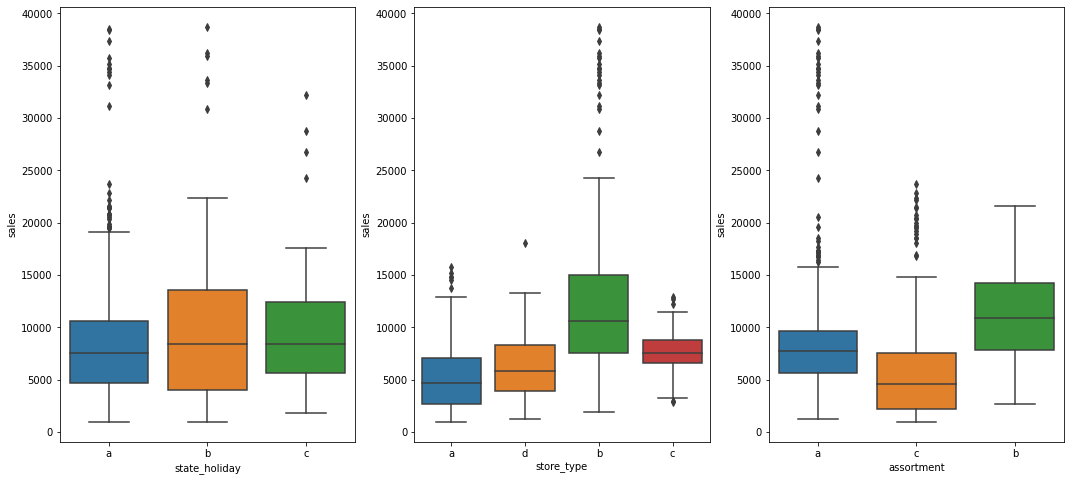

In [127]:
aux = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=aux)
plt.subplot(1, 3, 2)
sns.boxplot(x='store_type', y='sales', data=aux)
plt.subplot(1, 3, 3)
sns.boxplot(x='assortment', y='sales', data=aux)